Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

computer vision is the practice of writing algos which can discover patterns in visual data. Such as the camera of a self driving car recognizing the car in front.

##get the data

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2024-04-03 16:19:45--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.26.207, 172.217.193.207, 172.217.204.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.26.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   145MB/s    in 0.7s    

2024-04-03 16:19:46 (145 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



##Inspect the data (become one with it)
A very crucial step at the beginning of any machine learning project is becoming one with the data.
And for a computer vision project .. this usally means visualizing many samples of your data

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [ ]:
import os

#walk thorugh pizza_steack directory and list no of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}' .")

There are 2 directories and 0 images in 'pizza_steak' .
There are 2 directories and 0 images in 'pizza_steak/test' .
There are 0 directories and 250 images in 'pizza_steak/test/steak' .
There are 0 directories and 250 images in 'pizza_steak/test/pizza' .
There are 2 directories and 0 images in 'pizza_steak/train' .
There are 0 directories and 750 images in 'pizza_steak/train/steak' .
There are 0 directories and 750 images in 'pizza_steak/train/pizza' .


In [ ]:
#another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [ ]:
#visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  #setup the target directory we view images form here
  target_folder = target_dir+target_class
  #get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  #reda in yhe img and plot it
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  print(f"Image shape: {img.shape}")

  return img



['271592.jpg']
Image shape: (384, 512, 3)


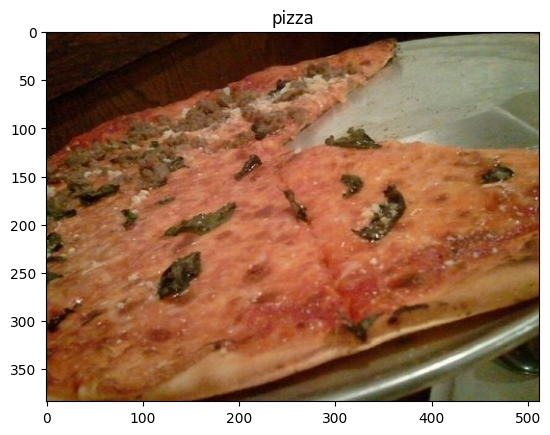

In [ ]:
img = view_random_image(target_dir = "pizza_steak/train/",
                        target_class="pizza")

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[ 24,  14,   4],
        [ 18,   8,   0],
        [ 23,  11,   0],
        ...,
        [ 43,  24,   9],
        [ 45,  26,  11],
        [ 40,  21,   6]],

       [[ 18,   5,   0],
        [ 17,   5,   0],
        [ 22,   8,   0],
        ...,
        [ 46,  29,  13],
        [ 50,  33,  17],
        [ 45,  28,  12]],

       [[ 32,  15,   5],
        [ 35,  18,   8],
        [ 39,  21,  11],
        ...,
        [ 60,  47,  28],
        [ 58,  43,  24],
        [ 49,  34,  15]],

       ...,

       [[146, 114,  67],
        [146, 114,  67],
        [145, 111,  65],
        ...,
        [ 90,  90,  40],
        [ 90,  88,  39],
        [ 90,  88,  39]],

       [[145, 116,  74],
        [143, 114,  72],
        [143, 111,  70],
        ...,
        [ 88,  87,  39],
        [ 90,  88,  40],
        [ 91,  89,  41]],

       [[148, 120,  80],
        [145, 117,  77],
        [143, 114,  74],
        ...,
        [ 85,  87,  4

In [ ]:
#view the image shape
img.shape #return width, height, colur channels


(384, 512, 3)

In [ ]:
#get all the pixel vlaues
img/255.

array([[[0.09411765, 0.05490196, 0.01568627],
        [0.07058824, 0.03137255, 0.        ],
        [0.09019608, 0.04313725, 0.        ],
        ...,
        [0.16862745, 0.09411765, 0.03529412],
        [0.17647059, 0.10196078, 0.04313725],
        [0.15686275, 0.08235294, 0.02352941]],

       [[0.07058824, 0.01960784, 0.        ],
        [0.06666667, 0.01960784, 0.        ],
        [0.08627451, 0.03137255, 0.        ],
        ...,
        [0.18039216, 0.11372549, 0.05098039],
        [0.19607843, 0.12941176, 0.06666667],
        [0.17647059, 0.10980392, 0.04705882]],

       [[0.1254902 , 0.05882353, 0.01960784],
        [0.1372549 , 0.07058824, 0.03137255],
        [0.15294118, 0.08235294, 0.04313725],
        ...,
        [0.23529412, 0.18431373, 0.10980392],
        [0.22745098, 0.16862745, 0.09411765],
        [0.19215686, 0.13333333, 0.05882353]],

       ...,

       [[0.57254902, 0.44705882, 0.2627451 ],
        [0.57254902, 0.44705882, 0.2627451 ],
        [0.56862745, 0

#An end to end example
lets build a cnn to find patterns in our images:
1. load our images
2. preprocess our images
3. build a cnn to find patterns in our images
4. compile aur cnn
5. fit the cnn to our training data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#set the seed
tf.random.set_seed(42)

#preprocess data (get all the pixel value sbetween 0 & 1 also called scaling))
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#setup paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

#import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)
#build a cnn model(same as the Tiny VGG on the cnn explainer website)

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#compile aur CNN

model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 123s 3s/step - loss: 0.5459 - accuracy: 0.7280 - val_loss: 0.3824 - val_accuracy: 0.8380
Epoch 2/5
47/47 [==============================] - 103s 2s/step - loss: 0.4041 - accuracy: 0.8233 - val_loss: 0.3256 - val_accuracy: 0.8680
Epoch 3/5
47/47 [==============================] - 112s 2s/step - loss: 0.3732 - accuracy: 0.8233 - val_loss: 0.3992 - val_accuracy: 0.8220
Epoch 4/5
47/47 [==============================] - 112s 2s/step - loss: 0.3291 - accuracy: 0.8660 - val_loss: 0.3916 - val_accuracy: 0.8200
Epoch 5/5
47/47 [==============================] - 101s 2s/step - loss: 0.3169 - accuracy: 0.8720 - val_loss: 0.4196 - val_accuracy: 0.8100
